## Coding Discussion 6
### Tianwei Liu

In 2019, the Amazon fires have attracted a lot of attention. The Brazilian government argued that fires in the forests are natural occurance, while there has been many controversies that the fires were results of illegal Brazilian's economic activities. In this coding discussion, I will try to use visualizations to explore the frequency of fire occurance. 

Dataset available at https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
## Read dataset into a pandas dataframe

with open("amazon.csv", encoding="latin-1") as datafile:
    dat = pd.read_csv(datafile)
dat.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [86]:
## Check for the difference between the date and year variable

dat.date.unique()

array(['1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
       '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
       '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
       '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
       '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01'],
      dtype=object)

It looks like the date variable, compared with the year variable, does not give us any new information on the time of forest fire occurance. We may drop the date variable.

In [87]:
dat = dat.iloc[:,0:4]
dat.head(5)

,year,state,month,number
0,1998,Acre,Janeiro,0.0
1,1999,Acre,Janeiro,0.0
2,2000,Acre,Janeiro,0.0
3,2001,Acre,Janeiro,0.0
4,2002,Acre,Janeiro,0.0


In [99]:
## We also notice that all months are in Spanish. So would be better if we translate them into English.

dat.month.replace({"Janeiro":"January","Fevereiro":"February","MarÁo":"March","Abril":"April","Maio":"May","Junho":"June","Julho":"July","Agosto":"August","Setembro":"September","Outubro":"October","Novembro":"November","Dezembro":"December"}, inplace = True)
dat.month.unique()

array(['January', 'February', 'Março', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

Text(0, 0.5, 'Number of Forest Fires')

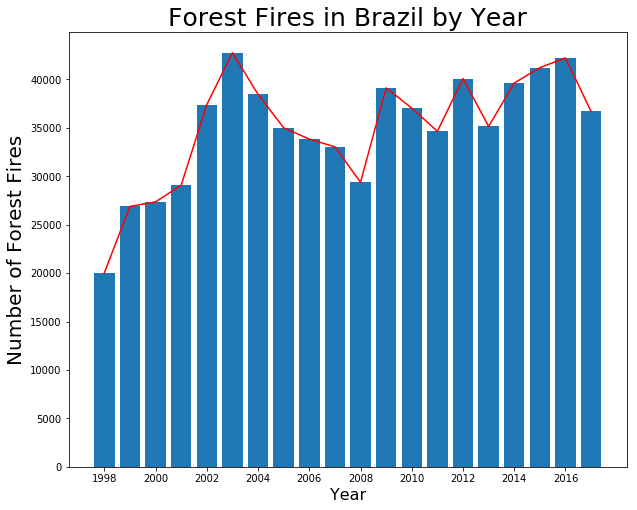

In [100]:
dat_year = \
(dat
    .filter(["year","number"])
    .groupby(["year"])
    .sum()
    .reset_index()
)

plt.figure(figsize = (10,8))
plt.bar(dat_year.year, dat_year.number)
plt.plot(dat_year.year, dat_year.number, color = "red")
plt.xticks(np.arange(1998, 2018, step=2))

plt.title("Forest Fires in Brazil by Year", fontsize = 25)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Forest Fires', fontsize=20)

Let's then explore in which months forest fires are likely to occur in Brazil. Based on BBC, fires peak in dry seasons in Brazil from July to October. I will try to use the following graph to explore if that's the case.

In [110]:
dat_month = \
(dat
    .filter(["month","number"])
    .groupby(["month"])
    .sum()
)
ordered = ["January","February","March","April","May","June","July","August","September","October","November","December"]
dat_month = dat_month.reindex (ordered)

In [91]:
x = dat_month.index
peakmonth = ["July","August","September","October"]

clr = []
for x in ordered:
    if x in peakmonth:
        clr.append("red")
    else:
        clr.append("grey")

Text(0, 0.5, 'Number of Forest Fires')

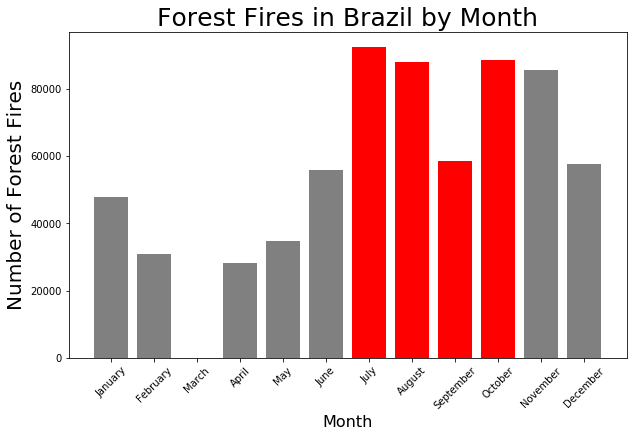

In [103]:
plt.figure(figsize = (10,6))
plt.bar(dat_month.index, dat_month.number, color = clr)

plt.xticks(rotation=45)
plt.title("Forest Fires in Brazil by Month", fontsize = 25)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Forest Fires', fontsize=20)

As we can see from the barplot, July - October (maybe including November) are indeed showing high occurances of forest fires! <br>
Last but not least, we will try to examine the geographical distribution of forest fires in Brazil.

Text(0, 0.5, 'Number of Forest Fires')

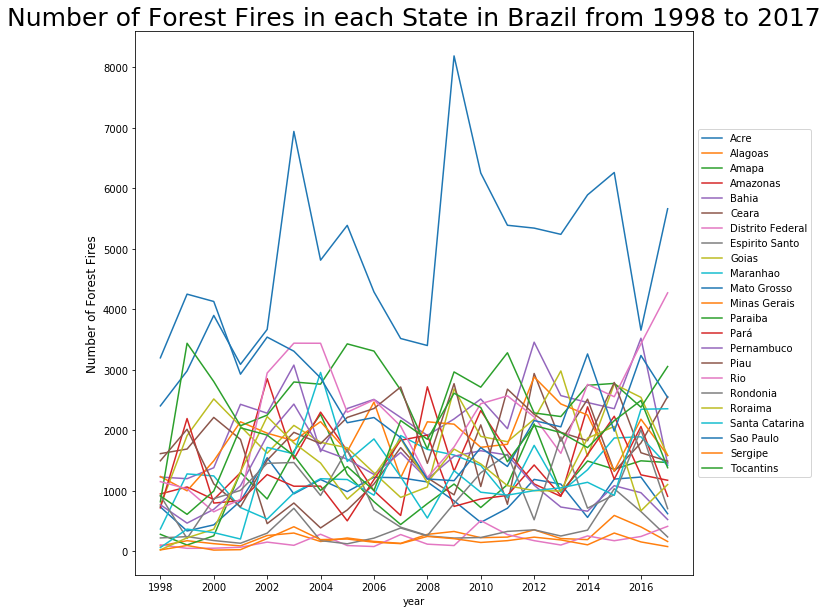

In [93]:
dat_state = \
(dat
    .filter(["year","state","number"])
    .groupby(["state","year"])
    .sum()
    .reset_index()
)
dat_state_pivot = dat_state.pivot (index = "year", columns = "state", values = "number")
dat_state_pivot.plot(figsize = (10,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(np.arange(1998, 2018, step=2))
plt.title("Number of Forest Fires in each State in Brazil from 1998 to 2017", fontsize = 25)
plt.ylabel('Number of Forest Fires', fontsize=12)